# Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)


# 1 Read the dataset to the python environment.

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data =  pd.read_excel("iris (1).xls")
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [4]:
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2 Do necessary pre-processing steps.

In [7]:
print(data.isnull().sum())

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64


In [8]:
data['SL'].fillna(data['SL'].median(),inplace=True)
data['SW'].fillna(data['SW'].median(),inplace=True)
data['PL'].fillna(data['PL'].median(),inplace=True)

In [9]:
print(data.isnull().sum())


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64


C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SL'>

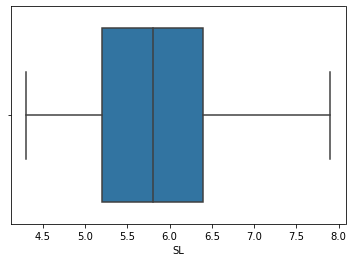

In [10]:
sns.boxplot(data['SL'])

C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SW'>

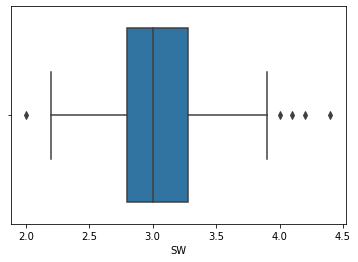

In [11]:
sns.boxplot(data['SW'])

FINDINGS:
    Outliers found in Sepal Width

In [14]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print('The values of SW below',lower_limit,'and the values  of SW above',upper_limit,'are outliers.')


The values of SW below 2.1249999999999996 and the values  of SW above 3.9250000000000003 are outliers.


In [15]:
outlier=[]
for x in data['SW']:
    if x > upper_limit or x < lower_limit:
        outlier.append(x)
        
print('There are',len(outlier),'outliers in SW column.','\n')
print('Outliers are:',outlier)

There are 5 outliers in SW column. 

Outliers are: [4.0, 4.4, 4.1, 4.2, 2.0]


In [16]:
ind1,ind2=data['SW'] > upper_limit,data['SW'] < lower_limit
i1=data.loc[ind1].index
i2=data.loc[ind2].index
print('The index values of the outliers which are above upper limit:',i1,'\n')
print('The Index values of the outliers which are below lower limit:',i2)

The index values of the outliers which are above upper limit: Int64Index([14, 15, 32, 33], dtype='int64') 

The Index values of the outliers which are below lower limit: Int64Index([60], dtype='int64')


In [17]:
data.drop([14,15,32,33,60],inplace=True)

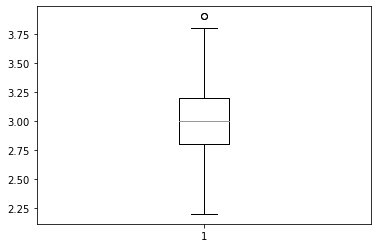

In [18]:
plt.boxplot(data['SW'])

plt.show()

C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PL'>

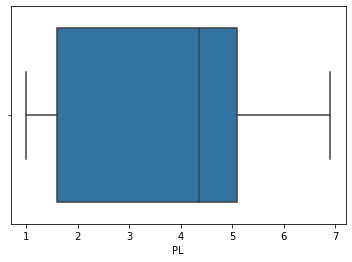

In [12]:
sns.boxplot(data['PL'])

C:\Users\AJTP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PW'>

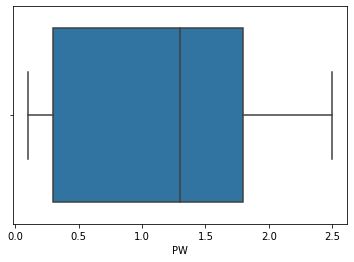

In [13]:
sns.boxplot(data['PW'])

# 3 Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [24]:
 
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
 # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA
from sklearn.model_selection import train_test_split

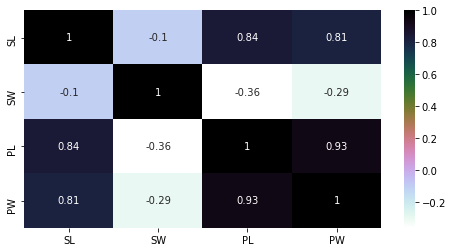

In [19]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [25]:
train, test = train_test_split(data, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(101, 5)
(44, 5)


In [27]:
train_X = train[['SL','SW','PL','PW']] # taking the training data features
train_y = train.Classification # output of the training data

test_X = test[['SL','SW','PL','PW']] # taking test data feature
test_y = test.Classification# output value of the test data

In [28]:
train_X.head()

,SL,SW,PL,PW
12,4.8,3.0,1.4,0.1
43,5.0,3.0,1.6,0.6
53,5.5,2.3,4.0,1.3
37,4.9,3.1,1.5,0.1
81,5.5,2.4,3.7,1.0


In [29]:
test_X.head()

,SL,SW,PL,PW
135,7.7,3.0,6.10,2.3
28,5.2,3.4,4.35,0.2
39,5.8,3.4,1.50,0.2
129,7.2,3.0,5.80,1.6
124,6.7,3.0,5.70,2.1


In [30]:
train_y.head()

12        Iris-setosa
43        Iris-setosa
53    Iris-versicolor
37        Iris-setosa
81    Iris-versicolor
Name: Classification, dtype: object

# SVM

In [31]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.9090909090909091


# Logistic REgression

In [33]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))


The accuracy of Logistic Regression is:  0.9090909090909091


# Decision Tree

In [34]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.8863636363636364


# KNN

In [35]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9318181818181818


<ipython-input-37-b960fdd3174b>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a = pd.Series()


([<matplotlib.axis.XTick at 0x1f05801a490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

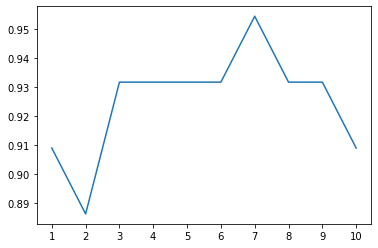

In [37]:
#Let's check the accuracy for various values of n for K-Nearest nerighbours
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

 FINDINGS: KNN is the most accurate model.

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import datasets

In [63]:
X = data.drop('Classification',axis=1)
y = data['Classification']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [65]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [66]:
rfc_pred = rfc.predict(X_test)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        17

       accuracy                           0.98        44
      macro avg       0.98      0.98      0.98        44
   weighted avg       0.98      0.98      0.98        44

